# 0: Overview

# 0.1: Requirements

# 0.2: General Imports


In [258]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fancyimpute'

# 1: Data Access

Main Dataset: https://github.com/owid/covid-19-data/tree/master/public/data

This link will take you to a GitHub repository. Within the README.md file within this repository, there is an option to download the complete COVID-19 dataset. Please download the CSV version from the various file type options. 


Index Dataset: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md

This link will take you to another GitHub repository, the Oxford Coronavirus Government Response tracker project. In Particular, it will take you to the methodology for calculating indices. Under the Indices header, there is an option to download the OxCGRT_latest.csv file containing the necessary indices we shall use for this project. 


# 1.1: Data Augementation 

We want to create the 2 datasets so that we can proceed with our project 

In [9]:
import pandas as pd

# Load Dataset 1 (e.g., COVID-19 data from Our World in Data)
df_covid = pd.read_csv(r'C:\Users\markm\OneDrive\Documents\University\Year 4\dst\data\our_world_in_data_covid_data.csv')

# Load Dataset 2 (e.g., Policy Tracker from OxCGRT)
df_policy = pd.read_csv(r'C:\Users\markm\OneDrive\Documents\University\Year 4\dst\data\OxCGRT_timeseries_all.csv')


In [ ]:
print(df_covid.head())

In [ ]:
print(df_policy.head())

In [ ]:
print(df_covid.info())

# Computing Nation Level Index

For variables that are additive, we will sum the values for different regions e.g. case counts, hospitalizations

For variables like the Stringency Index, we will compute a simple average.

In [18]:
#print(df_policy.head())

# Check for columns like 'Country', 'Region', 'date', and 'Stringency_Index'
print(df_policy.columns)

Index(['country_code', 'country_name', 'region_code', 'region_name',
       'jurisdiction', '01Jan2020', '02Jan2020', '03Jan2020', '04Jan2020',
       '05Jan2020',
       ...
       '11Feb2023', '12Feb2023', '13Feb2023', '14Feb2023', '15Feb2023',
       '16Feb2023', '17Feb2023', '18Feb2023', '19Feb2023', '20Feb2023'],
      dtype='object', length=1152)


In [10]:
import pandas as pd

# Path to your Excel file
file_path = r'C:\Users\markm\OneDrive\Documents\University\Year 4\dst\data\OxCGRT_timeseries_all.xlsx'

df_stringency = pd.read_excel(file_path, sheet_name='stringency_index_avg')
df_containment_health = pd.read_excel(file_path, sheet_name='containment_health_index_avg')
df_government_response = pd.read_excel(file_path, sheet_name='government_response_index_avg')
df_economic_support = pd.read_excel(file_path, sheet_name='economic_support_index')

# List of the dataframes to process
indexes = [df_stringency, df_containment_health, df_government_response, df_economic_support]
filtered_indexes = []

# Filter each dataframe and store the filtered version in 'filtered_indexes'
for df in indexes:
    filtered_df = df[df['jurisdiction'] == 'NAT_TOTAL']
    filtered_indexes.append(filtered_df)

# Assign the filtered dataframes back to their original variables (optional)
df_stringency, df_containment_health, df_government_response, df_economic_support = filtered_indexes

# Save the filtered dataframes as separate CSV files
# df_stringency.to_csv('stringency_index',index=False)
# df_containment_health.to_csv('containment_health_filtered.csv', index=False)
# df_government_response.to_csv('government_response_filtered.csv', index=False)
# df_economic_support.to_csv('economic_support_filtered.csv', index=False)




In [10]:
print(df_containment_health.head())

  country_code country_name region_code region_name jurisdiction  01Jan2020  \
0          ABW        Aruba         NaN         NaN    NAT_TOTAL        0.0   
1          AFG  Afghanistan         NaN         NaN    NAT_TOTAL        0.0   
2          AGO       Angola         NaN         NaN    NAT_TOTAL        0.0   
3          ALB      Albania         NaN         NaN    NAT_TOTAL        0.0   
4          AND      Andorra         NaN         NaN    NAT_TOTAL        0.0   

   02Jan2020  03Jan2020  04Jan2020  05Jan2020  ...  11Feb2023  12Feb2023  \
0        0.0        0.0        0.0        0.0  ...        NaN        NaN   
1        0.0        0.0        0.0        0.0  ...        NaN        NaN   
2        0.0        0.0        0.0        0.0  ...        NaN        NaN   
3        0.0        0.0        0.0        0.0  ...        NaN        NaN   
4        0.0        0.0        0.0        0.0  ...        NaN        NaN   

   13Feb2023  14Feb2023  15Feb2023  16Feb2023  17Feb2023  18Feb2023 

To align the format of the Oxford data with the OWID dataset, where dates are stored in a single column, you'll need to "melt" the Oxford dataset (which has dates as separate columns) into a "long" format, where each date becomes a row under a single date column. After this transformation, both datasets will have the same structure for dates, making it easier to merge or analyze them together.

In [11]:
import pandas as pd
# Load the filtered dataset (using the one with national totals only)
df_containment_health = pd.read_csv('containment_health_filtered.csv')

date_range = pd.date_range(start='2020-01-05', end='2024-08-04')

df_containment_health['date'] = date_range

print(df_containment_health.head())

#df_containment_health.to_csv('containment_health_with_dates.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'containment_health_filtered.csv'

Sure! To create a new CSV file containing the country code, country name, and a date range from January 5, 2020, to August 4, 2024, we can follow these steps:

In [6]:
import pandas as pd

# Load the dataset containing country information
df_containment_health = pd.read_csv('containment_health_filtered.csv')

# Generate the date range
date_range = pd.date_range(start='2020-01-05', end='2024-08-04')

# Create a DataFrame with country codes and names
country_data = df_containment_health[['country_code', 'country_name']].drop_duplicates()

# Create a new DataFrame to hold the expanded country-date information
country_date_list = []

# For each country, append the country code, name, and each date
for _, row in country_data.iterrows():
    for date in date_range:
        country_date_list.append({
            'country_code': row['country_code'],
            'country_name': row['country_name'],
            'date': date,
            'stringency_index': 0,
            'containment_health_index': 0,
            'government_response_index': 0,
            'economic_support_index': 0
        })

# Convert the list to a DataFrame
df_country_dates = pd.DataFrame(country_date_list)

# Save to a new CSV file
#f_country_dates.to_csv('country_date_range.csv', index=False)

print(df_country_dates.head())

print(df_country_dates.iloc[100][0])



  country_code country_name       date  stringency_index  \
0          ABW        Aruba 2020-01-05                 0   
1          ABW        Aruba 2020-01-06                 0   
2          ABW        Aruba 2020-01-07                 0   
3          ABW        Aruba 2020-01-08                 0   
4          ABW        Aruba 2020-01-09                 0   

   containment_health_index  government_response_index  economic_support_index  
0                         0                          0                       0  
1                         0                          0                       0  
2                         0                          0                       0  
3                         0                          0                       0  
4                         0                          0                       0  
ABW


C:\Users\markm\AppData\Local\Temp\ipykernel_28052\604135733.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_country_dates.iloc[100][0])


ABW
AFG
AFG
AGO
AGO
None


C:\Users\markm\AppData\Local\Temp\ipykernel_33372\435015072.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_country_dates.iloc[1673][0])
C:\Users\markm\AppData\Local\Temp\ipykernel_33372\435015072.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_country_dates.iloc[1674][0])
C:\Users\markm\AppData\Local\Temp\ipykernel_33372\435015072.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_country_dates.i

In [12]:
# row_index_start = 0
# column_index_start = 9 # need to start on the 5th Jan 2020
# column_index_end = 1100
# row_index_end = 186

# for row in range(row_index_start,row_index_end):
#     current_vals = []
#     current_country = df_stringency.iloc[row][0]
#     for column in range(column_index_start,column_index_end):
#         date_value = df_stringency.iloc[row][column]  # Get the value for the current date
#         date = df_country_dates['date'].iloc[(row * (column_index_end - column_index_start)) + (column - column_index_start)]
#         # Find the corresponding index in df_country_dates to update the stringency_index
#         df_country_dates.loc[(df_country_dates['country_code'] == current_country) & (df_country_dates['date'] == date), 'stringency_index'] = date_value
#         # if df_stringency.iloc[row][column] != 0:
#         #  print(row,column,df_stringency.iloc[row][column])
#         #  break
    
        
   
# print(df_country_dates)
   
    
    





# print(df_stringency.iloc[row_index][column_index])

C:\Users\markm\AppData\Local\Temp\ipykernel_5432\774640291.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_country = df_stringency.iloc[row][0]
C:\Users\markm\AppData\Local\Temp\ipykernel_5432\774640291.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date_value = df_stringency.iloc[row][column]  # Get the value for the current date
C:\Users\markm\AppData\Local\Temp\ipykernel_5432\774640291.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

KeyboardInterrupt: 

In [8]:
print(df_country_dates[df_country_dates["stringency_index"] != 0 & (df_country_dates['country_code'] == 'ABW')])

NameError: name 'df_country_dates' is not defined

In [14]:
df = df_stringency

# Display original DataFrame
# print("Original DataFrame:")
# print(df)

# Transpose the first row (index 0)
row_to_transpose = df.iloc[0][9:]  # Select the row you want to transpose
transposed_row = row_to_transpose.transpose()  # Transpose the row
print(transposed_row)


# # Convert the transposed row to a DataFrame for better formatting
# transposed_df = pd.DataFrame(transposed_row).reset_index()
# transposed_df.columns = ['Attribute', 'Value']  # Rename columns for clarity

# # Display transposed DataFrame
# print("\nTransposed Row:")
# print(transposed_df)

05Jan2020    0.0
06Jan2020    0.0
07Jan2020    0.0
08Jan2020    0.0
09Jan2020    0.0
            ... 
16Feb2023    NaN
17Feb2023    NaN
18Feb2023    NaN
19Feb2023    NaN
20Feb2023    NaN
Name: 0, Length: 1143, dtype: object


In [7]:
row_to_transpose = df_stringency.iloc[0][9:]  # Selecting the relevant portion of the row
transposed_row = row_to_transpose.transpose()  # Transpose the row

# Create a date range from the first date in your data to 4th August 2024
date_range = pd.date_range(start='05-Jan-2020', end='04-Aug-2024', freq='D')

# Convert the transposed row to a DataFrame
transposed_df = pd.DataFrame(transposed_row).reset_index()
transposed_df.columns = ['date', 'Stringency Index']  # Rename columns for clarity

# Ensure the 'date' column is in datetime format
transposed_df['date'] = pd.to_datetime(transposed_df['date'], format='%d%b%Y')

# Create a new DataFrame with the complete date range and NaNs
complete_df = pd.DataFrame(date_range, columns=['date'])
complete_df = complete_df.merge(transposed_df, on='date', how='left')

# Display the complete DataFrame


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset

# Create a complete date range from January 5, 2020, to August 4, 2024
date_range = pd.date_range(start='05-Jan-2020', end='04-Aug-2024', freq='D')
complete_dates_df = pd.DataFrame(date_range, columns=['date'])  # Create a DataFrame with all dates

# Create a list to store the complete DataFrames for each country
complete_dataframes = []

# Iterate through each row in df_containment_health
for row_index in range(df_containment_health.shape[0]):  # Iterate through rows
    # Select the row you want to transpose (excluding first 9 columns)
    row_to_transpose = df_containment_health.iloc[row_index][9:]  # Adjust index as needed
    transposed_row = row_to_transpose.transpose()  # Transpose the row

    # Convert the transposed row to a DataFrame
    transposed_df = pd.DataFrame(transposed_row).reset_index()
    transposed_df.columns = ['date', 'CH Index']  # Rename columns for clarity

    # Ensure the 'Date' column is in datetime format
    transposed_df['date'] = pd.to_datetime(transposed_df['date'], format='%d%b%Y')

    # Merge with the complete date range DataFrame
    complete_df = complete_dates_df.merge(transposed_df, on='date', how='left')

    # Add a new column for country code or name if needed
    complete_df['Country'] = df_containment_health.iloc[row_index, 0]  # Assuming the first column is the country code/name

    # Append the complete DataFrame for this country to the list
    complete_dataframes.append(complete_df)

# Concatenate all the DataFrames in the list into a single DataFrame
final_df = pd.concat(complete_dataframes, ignore_index=True)

# Optionally, save the final DataFrame to an Excel file

print(final_df[final_df['CH Index'] != 0.0])  # Display the first few rows of the final DataFrame


In [14]:
def transposer(dataset,index_name):
    # Create a complete date range from January 5, 2020, to August 4, 2024
    date_range = pd.date_range(start='05-Jan-2020', end='04-Aug-2024', freq='D')
    complete_dates_df = pd.DataFrame(date_range, columns=['date'])  # Create a DataFrame with all dates

# Create a list to store the complete DataFrames for each country
    complete_dataframes = []

# Iterate through each row in df_containment_health
    for row_index in range(dataset.shape[0]):  # Iterate through rows
        # Select the row you want to transpose (excluding first 9 columns)
        row_to_transpose = dataset.iloc[row_index][9:]  # Adjust index as needed
        transposed_row = row_to_transpose.transpose()  # Transpose the row

         # Convert the transposed row to a DataFrame
        transposed_df = pd.DataFrame(transposed_row).reset_index()
        transposed_df.columns = ['date', index_name+' ' 'Index']  # Rename columns for clarity

         # Ensure the 'Date' column is in datetime format
        transposed_df['date'] = pd.to_datetime(transposed_df['date'], format='%d%b%Y')

        # Merge with the complete date range DataFrame
        complete_df = complete_dates_df.merge(transposed_df, on='date', how='left')

        # Add a new column for country code or name if needed
        complete_df['iso_code'] = dataset.iloc[row_index, 0]  # Assuming the first column is the country code/name

        # Append the complete DataFrame for this country to the list
        complete_dataframes.append(complete_df)

# Concatenate all the DataFrames in the list into a single DataFrame
    final_df = pd.concat(complete_dataframes, ignore_index=True)
    return final_df




In [15]:
transposed_stringency = transposer(df_stringency,'Stringency')
#print(tranposed_stringency[tranposed_stringency['Stringency Index'] != 0])
print(transposed_stringency)
print()
transposed_containment_health = transposer(df_containment_health, 'CH')
#print(tranposed_containment_health[tranposed_containment_health['CH Index'] != 0])
print(transposed_containment_health)
print()
transposed_government_response = transposer(df_government_response, 'Gov Resp')
#print(transposed_government_response[transposed_government_response['Gov Resp Index'] != 0])
print()
transposed_economic_support = transposer(df_economic_support, 'Econ Sup')
#print(transposed_economic_support[transposed_economic_support['Econ Sup Index'] != 0])


# transposed_stringency.to_excel('stringency.xlsx', index=False)
# transposed_containment_health.to_excel('ch.xlsx', index=False)
# transposed_government_response.to_excel('gov_resp.xlsx', index=False)
# transposed_economic_support.to_excel('econ_sup.xlsx', index=False)

             date Stringency Index iso_code
0      2020-01-05              0.0      ABW
1      2020-01-06              0.0      ABW
2      2020-01-07              0.0      ABW
3      2020-01-08              0.0      ABW
4      2020-01-09              0.0      ABW
...           ...              ...      ...
313033 2024-07-31              NaN      ZWE
313034 2024-08-01              NaN      ZWE
313035 2024-08-02              NaN      ZWE
313036 2024-08-03              NaN      ZWE
313037 2024-08-04              NaN      ZWE

[313038 rows x 3 columns]

             date CH Index iso_code
0      2020-01-05      0.0      ABW
1      2020-01-06      0.0      ABW
2      2020-01-07      0.0      ABW
3      2020-01-08      0.0      ABW
4      2020-01-09      0.0      ABW
...           ...      ...      ...
313033 2024-07-31      NaN      ZWE
313034 2024-08-01      NaN      ZWE
313035 2024-08-02      NaN      ZWE
313036 2024-08-03      NaN      ZWE
313037 2024-08-04      NaN      ZWE

[313038 row

These files have been saved onto the GITHUB in the personal folder of Mark Milner. We can now 

In [16]:
# print(len(transposed_stringency))
# print(len(transposed_containment_health))
# print(len(transposed_government_response))
# print(len(transposed_economic_support))
#print(transposed_containment_health.head())


# Join on index
# Join on index with suffixes to handle overlapping column names
# Join on index with suffixes to handle overlapping column names
df_combined = transposed_stringency.join(transposed_containment_health, how='inner', lsuffix='', rsuffix='_containment')
df_combined = df_combined.join(transposed_government_response, how='inner', lsuffix='_df_combined', rsuffix='_govresp')
df_combined = df_combined.join(transposed_economic_support, how='inner', lsuffix='_df_combined', rsuffix='_econsup')

# # Select only the desired columns
df_combined = df_combined[['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index']]

# Display the result
print(df_combined[df_combined['Stringency Index'] != 0])




             date iso_code Stringency Index CH Index Gov Resp Index  \
71     2020-03-16      ABW            11.11     9.52           8.33   
72     2020-03-17      ABW            22.22    16.67          14.58   
73     2020-03-18      ABW            33.33    26.19          22.92   
74     2020-03-19      ABW            33.33    29.76          26.04   
75     2020-03-20      ABW            33.33    29.76          26.04   
...           ...      ...              ...      ...            ...   
313033 2024-07-31      ZWE              NaN      NaN            NaN   
313034 2024-08-01      ZWE              NaN      NaN            NaN   
313035 2024-08-02      ZWE              NaN      NaN            NaN   
313036 2024-08-03      ZWE              NaN      NaN            NaN   
313037 2024-08-04      ZWE              NaN      NaN            NaN   

       Econ Sup Index  
71                0.0  
72                0.0  
73                0.0  
74                0.0  
75                0.0  
...

Ok, so now all of our indexes have been transposed appropriately

In [106]:

df_combined.to_excel('df_combined.xlsx', index=False)

In [17]:
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Check the updated column
print(df_covid['date'].head())

0    2020-01-05
1    2020-01-06
2    2020-01-07
3    2020-01-08
4    2020-01-09
Name: date, dtype: object


In [18]:
# df_combined['date'] = pd.to_datetime(df_combined['date'])
# df_covid['date'] = pd.to_datetime(df_covid['date'])

# print(df_combined.head())
# print()
# print(df_covid.head())


# Ensure the OWID dataset's date column is in datetime format
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y-%m-%d', errors='coerce')

# Ensure your other dataset's date column is also in datetime format (assuming it's named 'date')
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y-%m-%d', errors='coerce')

# Now perform the merge (assuming 'Date' and 'Country' are the keys)
merged_df = pd.merge(df_combined, df_covid, on=['iso_code', 'date'], how='inner')
print()
# Check the merged dataframe
print(merged_df.head())



        date iso_code Stringency Index CH Index Gov Resp Index Econ Sup Index  \
0 2020-01-05      ABW              0.0      0.0            0.0            0.0   
1 2020-01-06      ABW              0.0      0.0            0.0            0.0   
2 2020-01-07      ABW              0.0      0.0            0.0            0.0   
3 2020-01-08      ABW              0.0      0.0            0.0            0.0   
4 2020-01-09      ABW              0.0      0.0            0.0            0.0   

       continent location  total_cases  new_cases  ...  male_smokers  \
0  North America    Aruba          0.0        0.0  ...           NaN   
1  North America    Aruba          0.0        0.0  ...           NaN   
2  North America    Aruba          0.0        0.0  ...           NaN   
3  North America    Aruba          0.0        0.0  ...           NaN   
4  North America    Aruba          0.0        0.0  ...           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0    

In [39]:
#merged_df.to_excel('merged_df_test2.xlsx', index=False)
# print(merged_df['Stringency Index'])
# print(merged_df['stringency_index'])
# df_combined = df_combined.drop(df_combined.columns[1], axis=1)  # or change 1 to the actual index of the second 'date'
# print(merged_df.head())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
311536    NaN
311537    NaN
311538    NaN
311539    NaN
311540    NaN
Name: Stringency Index, Length: 311541, dtype: object
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
311536    NaN
311537    NaN
311538    NaN
311539    NaN
311540    NaN
Name: stringency_index, Length: 311541, dtype: float64


In [19]:
print(merged_df.columns)


Index(['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index',
       'Econ Sup Index', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

I now need to decide on a train / test split. I'm going to impliment K-fold cross validation on this dataset during my training phase

In [14]:
print(merged_df['iso_code'].unique())
print(len(merged_df['iso_code'].unique()))
# 80/20 split 
print(186/6)
print(31*5)
print(100/6 * 5)


['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA'
 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD'
 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK'
 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO'
 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MEX' 'MLI' 'MLT' 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS'
 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER'
 'PHL' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU'
 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SMR' 'SOM' 'SRB' 'SSD' 'SUR' 'SVK'
 'SVN' 'SWE' 'SWZ' 'SYC' 'SYR' 'TCD' 'TGO' 'THA' 'T

theres 186 unique countries. Since we want to splitting our test and training sets, we want to structure your cross-validation method around countries. Therefore, since there are 186 countries in total, we will have $155$ countries in our training (and validation) data and $31$ in our test data. To select a random sample of 155 elements from a set of 186 unique ISO codes in a Pandas DataFrame, you can use the sample() method. This method allows you to specify the number of samples you want to draw and will randomly select from the unique values.

In [77]:
import pandas as pd
import numpy as np
unique_iso_codes = merged_df['iso_code'].unique()
np.random.seed(21)
random_sample = np.random.choice(unique_iso_codes, size=155, replace=False)
# Convert to list for easier handling if needed
random_sample_list = random_sample.tolist()
# Display the randomly selected iso codes
print(random_sample_list)
print(len(random_sample_list))

training_iso_codes = random_sample_list
testing_iso_codes = list(set(unique_iso_codes) - set(training_iso_codes))
print(training_iso_codes)
print(testing_iso_codes)

['BFA', 'BLR', 'TUN', 'PRI', 'GUM', 'AZE', 'RUS', 'LTU', 'ERI', 'AGO', 'NLD', 'SUR', 'KAZ', 'BMU', 'MAR', 'TCD', 'MRT', 'BHS', 'BLZ', 'DJI', 'UZB', 'MNG', 'TUR', 'MDA', 'RWA', 'CYP', 'LSO', 'ARG', 'BOL', 'GAB', 'CRI', 'SVK', 'ISR', 'SVN', 'SLV', 'BTN', 'VUT', 'MMR', 'KHM', 'SWZ', 'COL', 'TJK', 'TTO', 'PSE', 'BRA', 'SWE', 'SRB', 'DEU', 'ROU', 'VEN', 'NOR', 'LVA', 'AUS', 'TWN', 'JPN', 'VNM', 'SMR', 'EST', 'JAM', 'USA', 'GEO', 'HTI', 'BGD', 'SAU', 'ZWE', 'ABW', 'SEN', 'MOZ', 'MLI', 'SSD', 'GRL', 'BDI', 'SYR', 'NZL', 'URY', 'LAO', 'CUB', 'KWT', 'SGP', 'DMA', 'COM', 'ALB', 'CAN', 'HND', 'LBR', 'COG', 'ETH', 'IDN', 'VIR', 'BEL', 'PAN', 'DZA', 'MAC', 'IRL', 'GMB', 'PAK', 'GRD', 'IRQ', 'KEN', 'KOR', 'HRV', 'JOR', 'QAT', 'CHL', 'CHN', 'PRT', 'BWA', 'SOM', 'EGY', 'AFG', 'LIE', 'BHR', 'FJI', 'SLB', 'TKM', 'CMR', 'ZMB', 'LBN', 'MUS', 'NIC', 'TLS', 'CZE', 'TGO', 'CPV', 'DNK', 'IND', 'KIR', 'PER', 'GIN', 'MCO', 'NPL', 'BRN', 'BRB', 'LUX', 'FRA', 'AUT', 'CIV', 'GUY', 'NER', 'GRC', 'GHA', 'SYC', 'UKR'

Ok, so we've got our training and testing split. Now let's split the dataset itself into our training and testing data. 

In [281]:
train_data = merged_df[merged_df['iso_code'].isin(training_iso_codes)]
test_data = merged_df[merged_df['iso_code'].isin(testing_iso_codes)]
print(train_data.columns)


Index(['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index',
       'Econ Sup Index', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

the following code cell takes approximately 10 minutes to run. For that reason, instead of running it yourself, the output train and test xlsx files can be accessed directly via the github at ...

In [289]:
train_data.to_excel('train.xlsx', index=False)
test_data.to_excel('test.xlsx', index=False)

## Implimenting Baseline model: A linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data contains the test dataset after the split
# Let's assume 'Reproduction_Rate' is your target and the rest are features

# Split features and target
X_test = test_data.drop(columns=['reproduction_rate'])  # Features
y_test = test_data['reproduction_rate']  # Target

# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_test):
    # Split the data into training and validation sets
    X_train, X_val = X_test.iloc[train_index], X_test.iloc[val_index]
    y_train, y_val = y_test.iloc[train_index], y_test.iloc[val_index]
    
    # Fit the linear regression model on the training data
    linear_model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = linear_model.predict(X_val)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)

# Print the average MSE
print(f'Average MSE across all folds: {average_mse:.4f}')


### another problem

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_28052\631162757.py in ?()
     26     X_train, X_val = X_test.iloc[train_index], X_test.iloc[val_index]
     27     y_train, y_val = y_test.iloc[train_index], y_test.iloc[val_index]
     28 
     29     # Fit the linear regression model on the training data
---> 30     linear_model.fit(X_train, y_train)
     31 
     32     # Make predictions on the validation set
     33     y_pred = linear_model.predict(X_val)

~\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py in ?(estimator, *args, **kwargs)
   1469                 skip_parameter_validation=(
   1470                     prefer_skip_nested_validation or global_skip_validation
   1471                 )
   1472             ):
-> 1473                 return fit_method(estimator, *args, **kwargs)

~\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_base.py in ?(self, X, y, sample_weight)
    605         n_jobs_ = self.n_jobs
    606 
    607         accept_sparse = False if self.positive else ["csr", "csc", "coo"]
    608 
--> 609         X, y = self._validate_data(
...
   2154         if (
   2155             astype_is_view(values.dtype, arr.dtype)
   2156             and using_copy_on_write()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [283]:
merged_df['days_since'] = merged_df.groupby('iso_code')['date'].transform(lambda x: (x - x.min()).dt.days)

# Display the first few rows to verify

In [287]:
train_data = merged_df[merged_df['iso_code'].isin(training_iso_codes)]
test_data = merged_df[merged_df['iso_code'].isin(testing_iso_codes)]
print(train_data.columns)

Index(['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index',
       'Econ Sup Index', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data and train_data contain the respective datasets after the split
# Removing the 'date' column
test_data = test_data.drop(columns=['date'])
train_data = train_data.drop(columns=['date'])

# Split features and target for train and test data
X_train = train_data.drop(columns=['reproduction_rate'])  # Training Features
y_train = train_data['reproduction_rate']  # Training Target

X_test = test_data.drop(columns=['reproduction_rate'])  # Testing Features
y_test = test_data['reproduction_rate']  # Testing Target

# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')


KeyError: "['date'] not found in axis"

In [6]:
# Get the list of all columns
all_columns = list(merged_df.columns)

# Move 'continent' and 'location' next to 'date' and 'iso_code'
new_column_order = ['date', 'iso_code', 'continent', 'location'] + [col for col in all_columns if col not in ['date', 'iso_code', 'continent', 'location']]

# Reorder the columns in the DataFrame
train_data = train_data[new_column_order]
test_data = test_data[new_column_order]


# Display the result to check the new order
print(train_data.columns)

NameError: name 'merged_df' is not defined

In [89]:
#print(train_data.columns[4:])


0         1
1         1
2         1
3         1
4         1
         ..
311536    1
311537    1
311538    1
311539    1
311540    1
Name: check, Length: 259279, dtype: int64


KeyError: 'check'

In [284]:
print(test_data.iloc[:, 4:])

       Gov Resp Index Econ Sup Index continent      location  total_cases  \
6696              0.0            0.0    Europe       Andorra          0.0   
6697              0.0            0.0    Europe       Andorra          0.0   
6698              0.0            0.0    Europe       Andorra          0.0   
6699              0.0            0.0    Europe       Andorra          0.0   
6700              0.0            0.0    Europe       Andorra          0.0   
...               ...            ...       ...           ...          ...   
308188            NaN            NaN    Africa  South Africa    4072765.0   
308189            NaN            NaN    Africa  South Africa    4072765.0   
308190            NaN            NaN    Africa  South Africa    4072765.0   
308191            NaN            NaN    Africa  South Africa    4072765.0   
308192            NaN            NaN    Africa  South Africa    4072765.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
6696    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data and train_data contain the respective datasets after the split
# Removing the 'date' column
test_data = test_data.iloc[:, 4:]
train_data = train_data.iloc[:, 4:]

# Split features and target for train and test data
X_train = train_data.drop(columns=['reproduction_rate'])  # Training Features
y_train = train_data['reproduction_rate']  # Training Target

X_test = test_data.drop(columns=['reproduction_rate'])  # Testing Features
y_test = test_data['reproduction_rate']  # Testing Target

# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_28052\145787188.py in ?()
     31     X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
     32     y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
     33 
     34     # Fit the linear regression model on the training fold
---> 35     linear_model.fit(X_train_fold, y_train_fold)
     36 
     37     # Make predictions on the validation fold
     38     y_val_pred = linear_model.predict(X_val_fold)

~\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py in ?(estimator, *args, **kwargs)
   1469                 skip_parameter_validation=(
   1470                     prefer_skip_nested_validation or global_skip_validation
   1471                 )
   1472             ):
-> 1473                 return fit_method(estimator, *args, **kwargs)

~\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_base.py in ?(self, X, y, sample_weight)
    605         n_jobs_ = self.n_jobs
    606 
    607         accept_sparse = False if self.positive else ["csr", "csc", "coo"]
    608 
--> 609         X, y = self._validate_data(
...
   2154         if (
   2155             astype_is_view(values.dtype, arr.dtype)
   2156             and using_copy_on_write()

ValueError: could not convert string to float: 'tests performed'

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data and train_data contain the respective datasets after the split
# Removing the 'date' column

# Covariates

X_test = test_data.iloc[:, 4:]
X_train = train_data.iloc[:, 4:]


X_train = train_data.drop(columns=['tests_units'])
y_train = train_data['reproduction_rate']  # Training Target
#print(X_train.columns)

X_test = test_data.drop(columns=['tests_units'])
y_test = test_data['reproduction_rate']  # Testing Target

# Split features and target for train and test data
X_train = train_data.drop(columns=['reproduction_rate'])  # Training Features
X_test = test_data.drop(columns=['reproduction_rate'])  # Testing Features


# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')

ValueError: could not convert string to float: 'tests performed'

In [285]:
print(train_data.columns)

Index(['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index',
       'Econ Sup Index', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

Ok So currently our training and test data looks like this:

In [307]:
print(train_data.columns)
print(test_data.columns)

Index(['date', 'iso_code', 'continent', 'location', 'Stringency Index',
       'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

we need to get rid of the columns we don't need. 

In [362]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

#print(train_data.columns)
#print(train_data_string_cols_rem.columns)


# TRAIN DATA

# we also need to remove the test_units column
train_data_tests_units_removed = train_data_string_cols_rem.drop(columns=['tests_units'])
train_data_tests_units_removed = train_data_string_cols_rem[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']].dropna()

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_train = train_data_tests_units_removed[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_train = train_data_tests_units_removed['reproduction_rate']

print()
print(X_train.shape)
print(len(y_train))

# TEST DATA

# we also need to remove the test_units column
test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])
test_data_tests_units_removed = test_data_string_cols_rem[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']].dropna()

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_test = test_data_tests_units_removed[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_test = test_data_tests_units_removed['reproduction_rate']

print()
print(X_test.shape)
print(len(y_test))








(139717, 5)
139717

(29044, 5)
29044


In [133]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data and train_data contain the respective datasets after the split
# Removing the 'date' column

# Covariate

X_train = train_data_tests_units_removed.drop(columns=['reproduction_rate'])
y_train = train_data_tests_units_removed['reproduction_rate']

X_test = test_data_tests_units_removed.drop(columns=['reproduction_rate'])  # Testing Features
y_train = test_data_tests_units_removed['reproduction_rate']

# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')

IndexError: positional indexers are out-of-bounds

In [319]:
print(X_test.shape)


(29044, 5)


In [353]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

print(X_test)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)
print("y_pred shape:", y_pred.shape)
print(y_pred)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')




       Stringency Index CH Index Gov Resp Index Econ Sup Index  days_since
6774              31.48    33.33          35.42           50.0          78
6775              31.48    33.33          35.42           50.0          79
6776              48.15    44.05          44.79           50.0          80
6777              48.15    44.05          44.79           50.0          81
6778               53.7    51.19          51.04           50.0          82
...                 ...      ...            ...            ...         ...
307606            11.11    21.43          21.88           25.0        1087
307607            11.11    21.43          21.88           25.0        1088
307608            11.11    21.43          21.88           25.0        1089
307609            11.11    21.43          21.88           25.0        1090
307610            11.11    21.43          21.88           25.0        1091

[29044 rows x 5 columns]
y_pred shape: (29044,)
[1.06203563 1.06166537 1.0619697  ... 0.65367573 0.

## visualising 

A scatter plot can help you see how well your predictions align with the actual values. Ideally, if the model is performing well, the points should be close to the line 
y=x.

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Reproduction Rate')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1000x600 with 0 Axes>

In [199]:
# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')

Average MSE across all folds (Training): 0.1374
Test MSE: 0.1233


In [200]:
coefficients = pd.DataFrame(linear_model.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                  Coefficient  Absolute Coefficient
Gov Resp Index       1.723192              1.723192
CH Index            -1.499979              1.499979
Econ Sup Index      -0.214710              0.214710
Stringency Index    -0.003951              0.003951
days_since          -0.000370              0.000370


A residuals plot shows the residuals (the difference between actual and predicted values) on the y-axis against the predicted values on the x-axis. This can help identify any patterns in the errors.

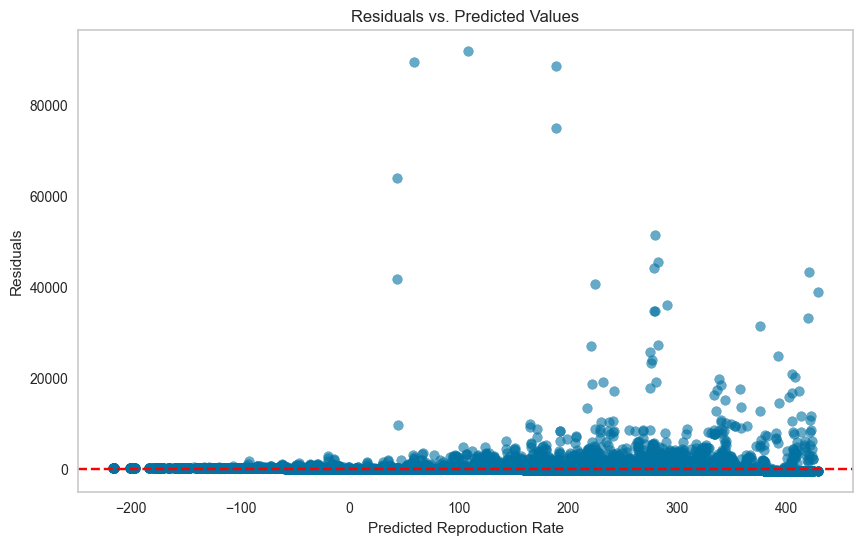

In [346]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Reproduction Rate')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [339]:
print(type(y_pred))
print(type(y_test))

print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
y_test shape: (32760,)
y_pred shape: (32760,)


3. Histogram of Residuals
A histogram of the residuals can show the distribution of errors, which should ideally be normally distributed around zero if the model is well-fitted.


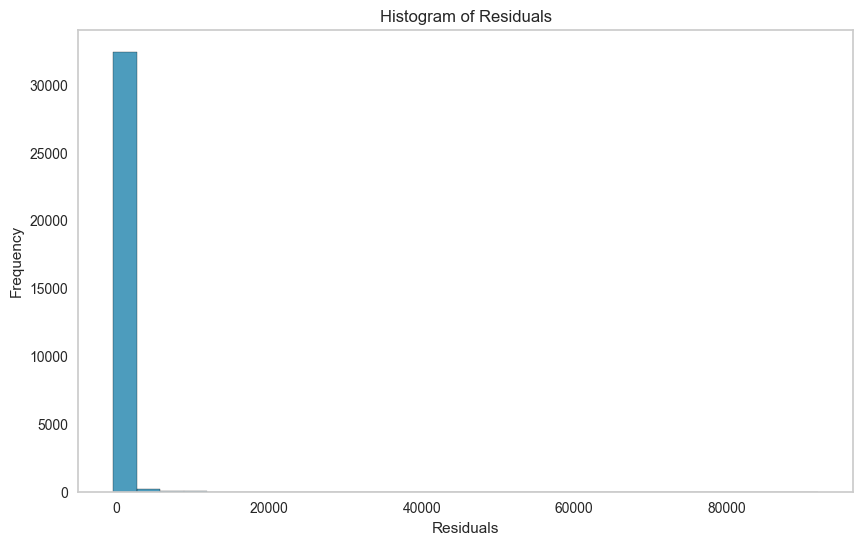

In [347]:

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

When we say that the residuals should be normally distributed around zero, we mean that:
Most of the errors (residuals) should be small and close to zero.
Errors should have a symmetrical distribution, with equal occurrences of positive and negative errors.
What This Implies:

If the residuals are normally distributed around zero, it suggests that:
The model is well-fitted to the data.
There is no systematic bias in the predictions. For instance, if the model consistently overestimates or underestimates the true values, this would show up as a skewed distribution of residuals, rather than a symmetric one around zero.

Learning Curves
Plotting the learning curve helps visualize how the model's performance evolves with different training set sizes. It gives insight into whether your model is underfitting or overfitting.

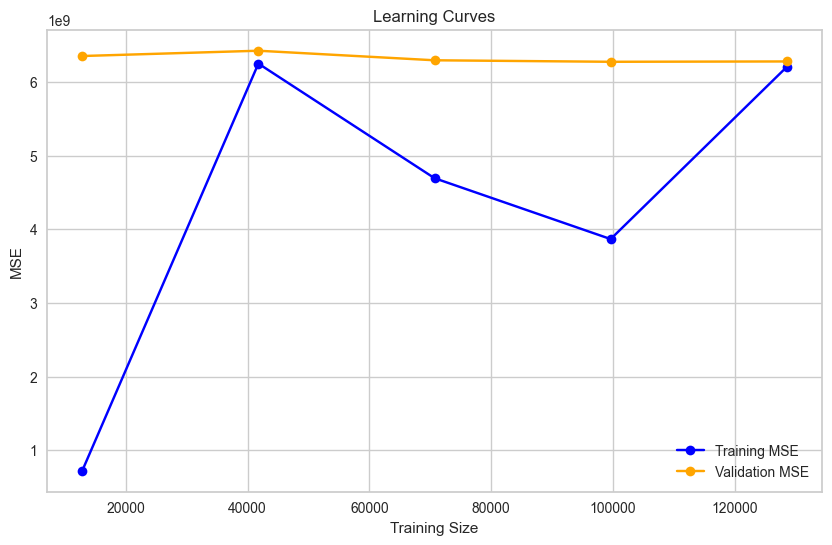

In [341]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Validation MSE')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\markm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


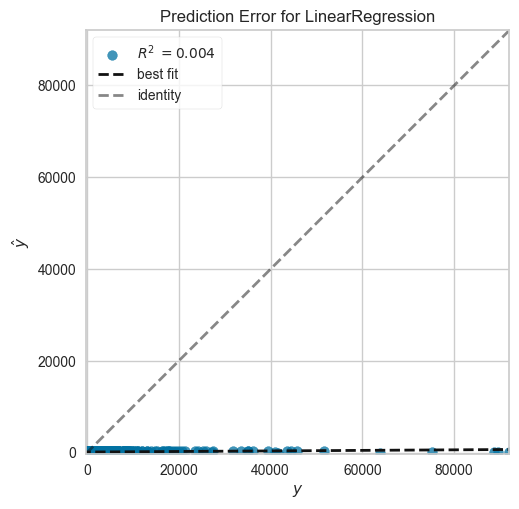

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [348]:
!pip install yellowbrick
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


## Dealing with Missing Data

In [30]:
#print(merged_df)
start_date = pd.to_datetime('2020-01-05')
end_date = pd.to_datetime('2022-12-31')


removed_dates = merged_df[merged_df['date'] <= end_date]
print(removed_dates.columns)

all_columns = removed_dates.columns
new_column_order = ['date', 'iso_code', 'continent', 'location'] + [col for col in all_columns if col not in ['date', 'iso_code', 'continent', 'location']]
removed_dates = removed_dates[new_column_order]

removed_str_columns = removed_dates.iloc[:, 4:].drop(columns=['tests_units'])

removed_str_columns_rel_cols = removed_str_columns[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','total_deaths','total_cases']]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Perform imputation
imputed = imputer.fit_transform(removed_str_columns_rel_cols)
# Convert back to DataFrame
imputation_complete = pd.DataFrame(imputed, columns=imputed.columns)

print(imputation_complete)

Index(['date', 'iso_code', 'Stringency Index', 'CH Index', 'Gov Resp Index',
       'Econ Sup Index', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

KeyboardInterrupt: 

Attempt 1: KNN  using slearn

current situ: taking too long to run

attempting to do it on 
train_data_tests_units_removed = train_data.iloc[:, 4:].drop(columns=['tests_units'])

i.e. all covariates but don't need to lets just try doing it on the indexes we started with.

In [270]:
print(train_data.iloc[:, 4:].drop(columns=['tests_units'])[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']])

        reproduction_rate Stringency Index CH Index Gov Resp Index  \
0                     NaN              0.0      0.0            0.0   
1                     NaN              0.0      0.0            0.0   
2                     NaN              0.0      0.0            0.0   
3                     NaN              0.0      0.0            0.0   
4                     NaN              0.0      0.0            0.0   
...                   ...              ...      ...            ...   
311536                NaN              NaN      NaN            NaN   
311537                NaN              NaN      NaN            NaN   
311538                NaN              NaN      NaN            NaN   
311539                NaN              NaN      NaN            NaN   
311540                NaN              NaN      NaN            NaN   

       Econ Sup Index  days_since  
0                 0.0           0  
1                 0.0           1  
2                 0.0           2  
3              

In [271]:
train_data_tests_units_removed = train_data.iloc[:, 4:].drop(columns=['tests_units'])[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']]
test_data_tests_units_removed = test_data.iloc[:, 4:].drop(columns=['tests_units'])[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']]


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
# Perform imputation
train_imputed = imputer.fit_transform(train_data_tests_units_removed)
# Convert back to DataFrame
train_na_sorted = pd.DataFrame(train_imputed, columns=train_imputed.columns)

#print(train_data.columns)
#print(train_data_string_cols_rem.columns)

# TRAIN DATA

# we also need to remove the test_units column

train = train_na_sorted

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_train = train[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_train = train['reproduction_rate']

print()
print(X_train.shape)
print(len(y_train))

# TEST DATA


# Perform imputation
test_imputed = imputer.fit_transform(test_data_tests_units_removed)

# Convert back to DataFrame
test_na_sorted = pd.DataFrame(test_imputed, columns=test_imputed.columns)

# we also need to remove the test_units column
test = test_na_sorted

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_test = test[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_test = test['reproduction_rate']

print()
print(X_test.shape)
print(len(y_test))


KeyboardInterrupt: 

In [273]:
!pip install fancyimpute

  Using cached fancyimpute-0.7.0-py3-none-any.whl



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\markm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [275]:
from fancyimpute import KNN

train_data_tests_units_removed = train_data.iloc[:, 4:].drop(columns=['tests_units'])[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']]
test_data_tests_units_removed = test_data.iloc[:, 4:].drop(columns=['tests_units'])[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']]

train_na_sorted = KNN(k=3).fit_transform(train_data_tests_units_removed)

#print(train_data.columns)
#print(train_data_string_cols_rem.columns)

# TRAIN DATA

# we also need to remove the test_units column

train = train_na_sorted

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_train = train[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_train = train['reproduction_rate']

print()
print(X_train.shape)
print(len(y_train))

# TEST DATA

test_na_sorted = KNN(k=3).fit_transform(test_data_tests_units_removed)

# we also need to remove the test_units column
test = test_na_sorted

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_test = test[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_test = test['reproduction_rate']

print()
print(X_test.shape)
print(len(y_test))

MemoryError: Unable to allocate 250. GiB for an array with shape (259279, 259279) and data type float32

In [265]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')


29044


## Choosing our Predictor Variables

In [250]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

#print(train_data.columns)
#print(train_data_string_cols_rem.columns)

# just_indexes_and_date = 
covariates_included = ['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients', 'hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_hosp_admissions','total_vaccinations','total_boosters' ]
covariates_and_dependent = covariates_included + ['reproduction_rate']

# TRAIN DATA

# we also need to remove the test_units column
train_data_tests_units_removed = train_data_string_cols_rem.drop(columns=['tests_units'])
train_data_tests_units_removed = train_data_string_cols_rem[covariates_and_dependent].dropna()

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_train = train_data_tests_units_removed[covariates_included]
y_train = train_data_tests_units_removed['reproduction_rate']

print()
print(X_train.shape)
print(len(y_train))

# TEST DATA

# we also need to remove the test_units column
test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])
test_data_tests_units_removed = test_data_string_cols_rem[covariates_and_dependent].dropna()

#test_data_tests_units_removed = test_data_string_cols_rem.drop(columns=['tests_units'])

X_test = test_data_tests_units_removed[covariates_included]
y_test = test_data_tests_units_removed['reproduction_rate']

print()
print(X_test.shape)
print(len(y_test))



(2349, 16)
2349

(608, 16)
608


In [251]:
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')



Mean Squared Error on the test data: 0.0622


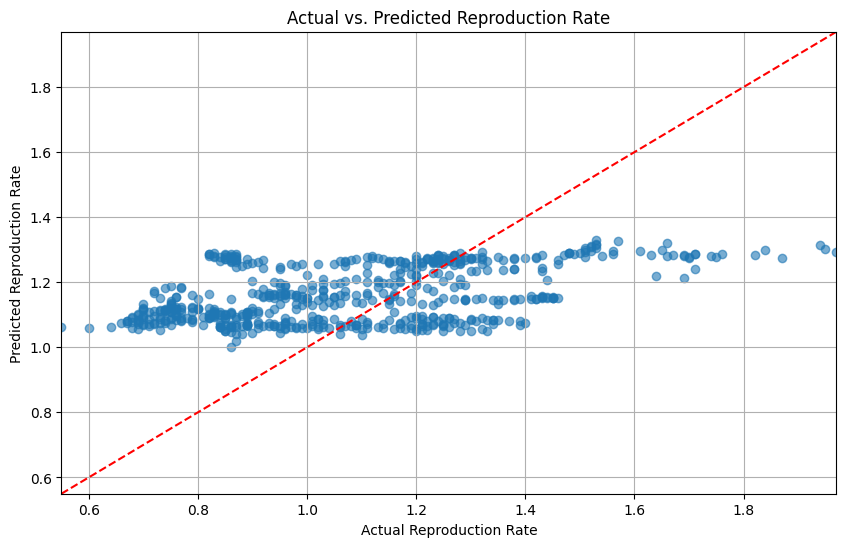

In [252]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Reproduction Rate')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


In [240]:
coefficients = pd.DataFrame(linear_model.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                                  Coefficient  Absolute Coefficient
Gov Resp Index                  -1.825868e+00          1.825868e+00
CH Index                         1.598507e+00          1.598507e+00
Econ Sup Index                   2.278433e-01          2.278433e-01
new_deaths_smoothed_per_million -1.429323e-02          1.429323e-02
Stringency Index                -2.420007e-03          2.420007e-03
days_since                      -2.739974e-04          2.739974e-04
new_deaths_smoothed             -2.252815e-04          2.252815e-04
new_cases_smoothed_per_million   2.269773e-05          2.269773e-05
icu_patients                     2.108612e-05          2.108612e-05
hosp_patients                   -1.162582e-07          1.162582e-07
new_cases_smoothed              -4.713302e-08          4.713302e-08


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming test_data and train_data contain the respective datasets after the split
# Removing the 'date' column
test_data = test_data.drop(columns=['date'])
train_data = train_data.drop(columns=['date'])

# Split features and target for train and test data
X_train = train_data.drop(columns=['reproduction_rate'])  # Training Features
y_train = train_data['reproduction_rate']  # Training Target

X_test = test_data.drop(columns=['reproduction_rate'])  # Testing Features
y_test = test_data['reproduction_rate']  # Testing Target

# Set up K-Fold Cross-Validation (using K=5 as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation on the training data
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the linear regression model on the training fold
    linear_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = linear_model.predict(X_val_fold)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)
print(f'Average MSE across all folds (Training): {average_mse:.4f}')

# Now, retrain the model on the entire training data
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_test_pred = linear_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')


KeyError: "['date'] not found in axis"

# Implimenting K-fold Cross Validation

In [186]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Initialize the linear regression model
linear_model = LinearRegression()

# Store performance metrics
mse_list = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets
    X_t, X_v = X_train[train_index], X_train[val_index]
    y_t, y_v = y_train[train_index], y_train[val_index]
    
    # Fit the linear regression model on the training data
    linear_model.fit(X_t, y_t)
    
    # Make predictions on the validation set
    y_pred = linear_model.predict(X_v)
    
    # Calculate Mean Squared Error (MSE) and append to list
    mse = mean_squared_error(y_v, y_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)

# Print the average MSE
print(f'Average MSE across all folds: {average_mse:.4f}')

# Optional: Visualize MSE for each fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o', linestyle='--')
plt.title('Mean Squared Error Across K-Folds')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, len(mse_list) + 1))
plt.grid()
plt.show()

KeyError: "None of [Index([     0,      1,      3,      4,      5,      7,      8,      9,     11,\n           12,\n       ...\n       139703, 139704, 139705, 139706, 139708, 139709, 139710, 139711, 139714,\n       139716],\n      dtype='int64', length=111773)] are in the [columns]"

In [197]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


# Initialize the linear regression model
linear_model = LinearRegression()

# Set up cross-validation (using 5 folds)
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(cv_scores)

# Since the scores are negative MSE, we take the absolute value to get positive MSE
mse_scores = -cv_scores

# Calculate the average MSE across all folds
average_mse = np.mean(mse_scores)

# Print the average MSE
print(f'Average MSE across all folds: {average_mse:.4f}')


[-0.14484132 -0.12628486 -0.13581666 -0.13928769 -0.14688768]
Average MSE across all folds: 0.1386


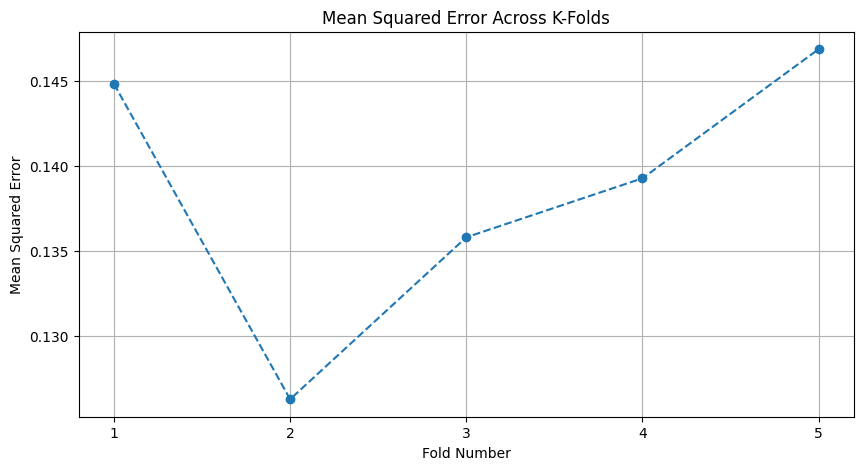

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='--')
plt.title('Mean Squared Error Across K-Folds')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, len(mse_scores) + 1))
plt.grid()
plt.show()


# Feature importance with regularization 

If you decide to use regularized models like Ridge or Lasso regression, they can help with feature selection. Lasso regression, in particular, can shrink some coefficients to zero, effectively performing feature selection.

In [373]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

lasso_coefficients = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])
lasso_coefficients['Absolute Coefficient'] = lasso_coefficients['Coefficient'].abs()
lasso_coefficients = lasso_coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(lasso_coefficients)


                  Coefficient  Absolute Coefficient
CH Index             0.002464              0.002464
Econ Sup Index       0.000789              0.000789
Gov Resp Index       0.000429              0.000429
days_since          -0.000296              0.000296
Stringency Index    -0.000000              0.000000


# EDA

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


combined = pd.concat([train_data_string_cols_rem, test_data_string_cols_rem], axis=0)  # Combine rows (axis=0)
combined = combined.drop(columns=['tests_units'])
print(combined.columns)

plt.figure(figsize=(20, 16))
sns.heatmap(combined.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Covariates and Reproduction Rate")
plt.show()


NameError: name 'pd' is not defined

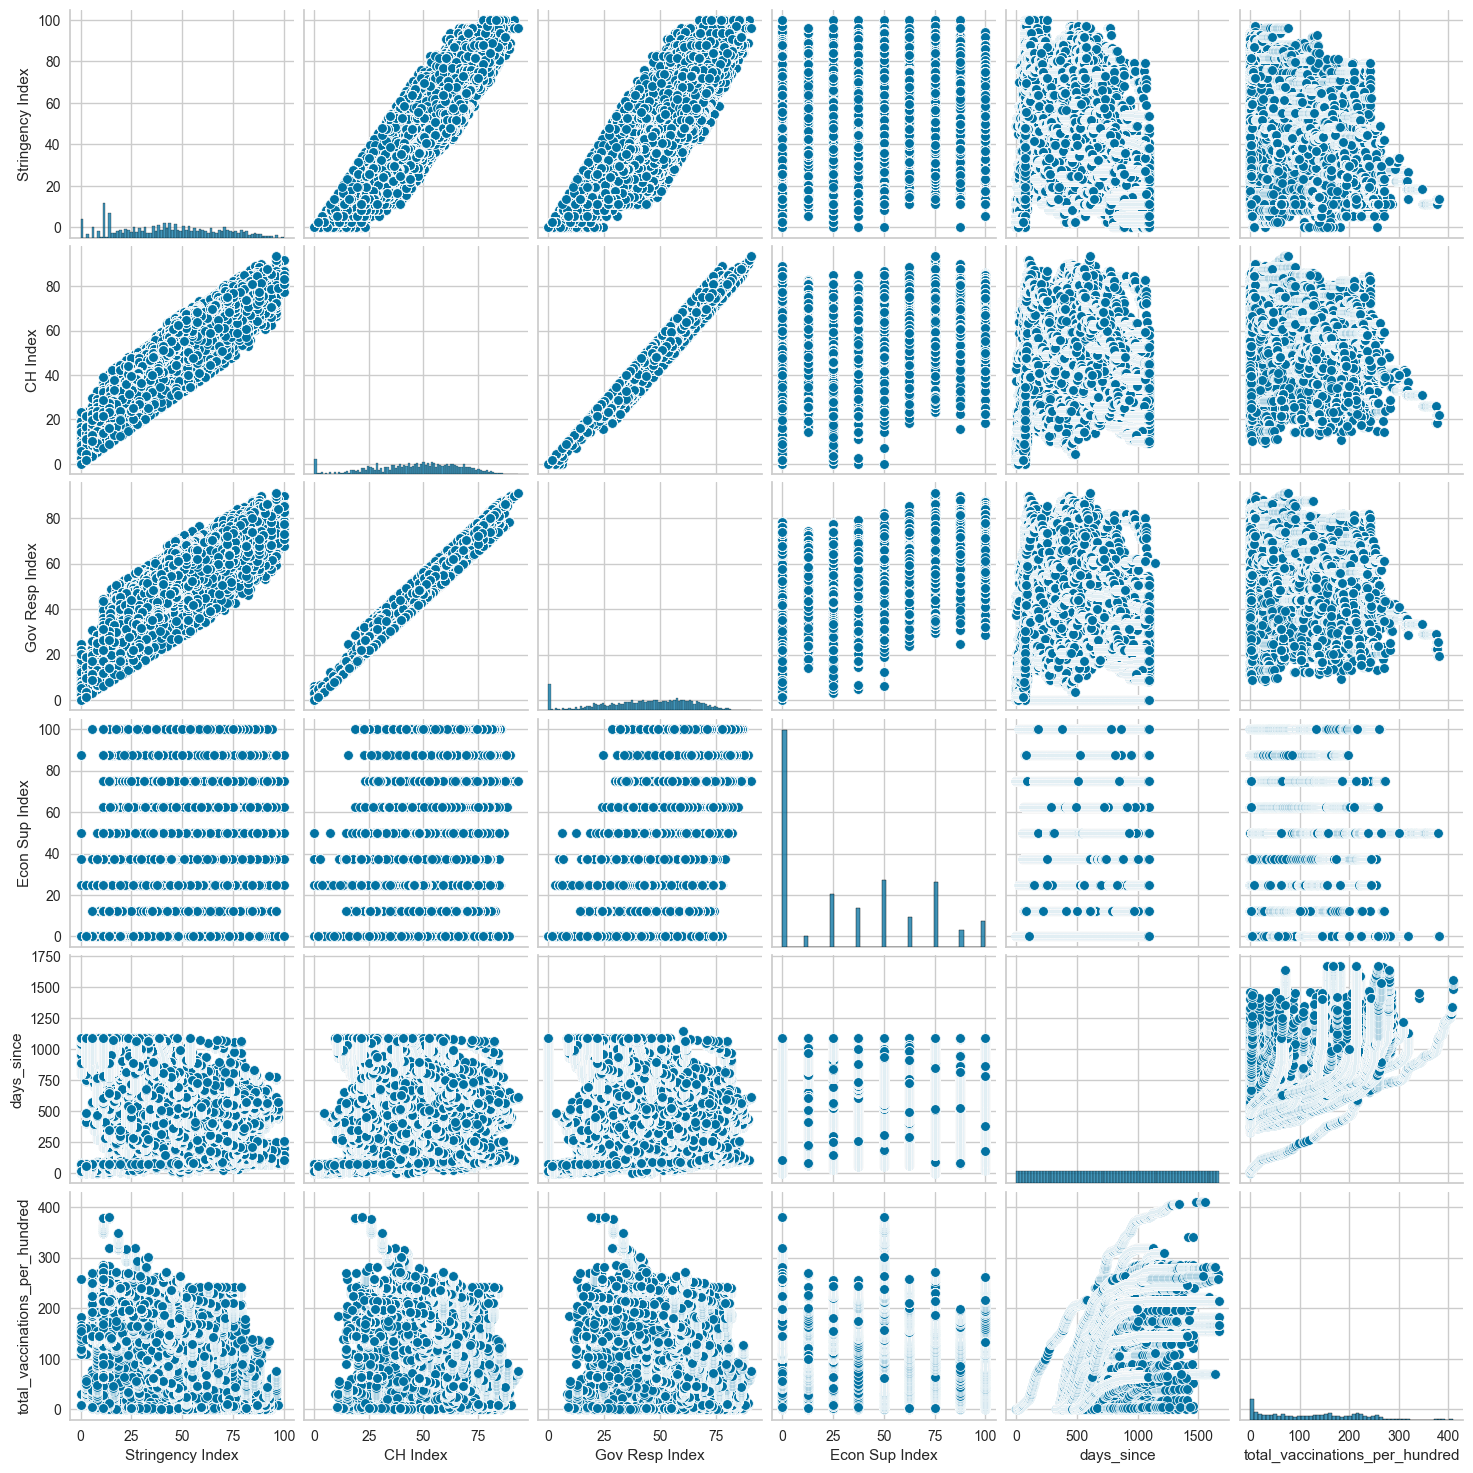

In [375]:
c = ['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since','total_vaccinations_per_hundred']
sns.pairplot(combined, vars=c)
plt.show()


In [372]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(combined[covariates_and_dependent])
vif_data = combined
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Feature"] = X.columns
print(vif_data)


C:\Users\markm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\markm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\markm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [368]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/4b/e4/f9e96896278308e17dfd4f60a84826c48117674c980234ee38f59ab28a12/statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.9 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.9 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.9 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.9 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\markm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
print(combined)

NameError: name 'combined' is not defined

# ALT APPROACH:

splitting dataset by a certain date instead

In [45]:
new_column_order = ['date', 'iso_code', 'continent', 'location'] + [col for col in all_columns if col not in ['date', 'iso_code', 'continent', 'location']]
merged_df = merged_df[new_column_order]
merged_df['days_since'] = merged_df.groupby('iso_code')['date'].transform(lambda x: (x - x.min()).dt.days)
print(merged_df.columns)

Index(['date', 'iso_code', 'continent', 'location', 'Stringency Index',
       'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

In [46]:
# Define the start and end dates for splitting

# Define the start and end dates for splitting



start_date = pd.to_datetime('2020-01-05')
end_date = pd.to_datetime('2022-12-31')

# Calculate the 80% cutoff date
total_duration = end_date - start_date  # Total duration as a Timedelta
cutoff_date = start_date + (total_duration * 0.8)  # Calculate cutoff date

print(cutoff_date)

# Split the dataset into train and test sets
train_set2 = merged_df[merged_df['date'] <= cutoff_date]
test_set2 = merged_df[merged_df['date'] > cutoff_date]

print(train_set2)
print(test_set2)

2022-05-26 19:12:00
             date iso_code      continent  location Stringency Index CH Index  \
0      2020-01-05      ABW  North America     Aruba              0.0      0.0   
1      2020-01-06      ABW  North America     Aruba              0.0      0.0   
2      2020-01-07      ABW  North America     Aruba              0.0      0.0   
3      2020-01-08      ABW  North America     Aruba              0.0      0.0   
4      2020-01-09      ABW  North America     Aruba              0.0      0.0   
...           ...      ...            ...       ...              ...      ...   
310735 2022-05-22      ZWE         Africa  Zimbabwe            47.13    53.52   
310736 2022-05-23      ZWE         Africa  Zimbabwe            47.13    53.52   
310737 2022-05-24      ZWE         Africa  Zimbabwe            47.13    53.52   
310738 2022-05-25      ZWE         Africa  Zimbabwe            47.13    53.52   
310739 2022-05-26      ZWE         Africa  Zimbabwe            47.13    53.51   

       

In [83]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats

In [84]:
train_data_string_cols_rem2 = train_set2.iloc[:, 4:]
test_data_string_cols_rem2 = test_set2.iloc[:, 4:]

print(train_data_string_cols_rem2.columns)


Index(['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinatio

In [85]:
covariates = ['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since','total_cases','reproduction_rate']
covariates_and_repr = covariates + ['total_deaths']

train_data_filtered = train_data_string_cols_rem2[covariates_and_repr].dropna()

X_train = train_data_filtered[covariates]
y_train = train_data_filtered[['total_deaths']]

print()
print(X_train.shape)
print(len(y_train))

test_data_filtered = test_data_string_cols_rem2[covariates_and_repr].dropna()

X_test = test_data_filtered[covariates]
y_test = test_data_filtered[['total_deaths']]

print(X_test)


print()
print(X_test.shape)
print(len(y_test))




(129606, 7)
129606
       Stringency Index CH Index Gov Resp Index Econ Sup Index  days_since  \
2547              11.11    18.21          15.94            0.0         873   
2548              11.11    18.21          15.94            0.0         874   
2549              11.11    18.21          15.94            0.0         875   
2550              11.11    18.21          15.94            0.0         876   
2551              11.11    18.21          15.94            0.0         877   
...                 ...      ...            ...            ...         ...   
310954             53.7    57.96          50.72            0.0        1087   
310955             53.7    57.96          50.72            0.0        1088   
310956             53.7    57.96          50.72            0.0        1089   
310957             53.7    57.96          50.72            0.0        1090   
310958             53.7    57.96          50.72            0.0        1091   

        total_cases  reproduction_rate  
25

In [95]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

print(X_test)

# def sigmoid(x):
#     return 100 / (1 + np.exp(-x))  # Scaling sigmoid to range 0-100

# Make predictions on the test data
y_pred = linear_model.predict(X_test)
# y_pred_sigmoid = sigmoid(y_pred)
print("y_pred shape:", y_pred.shape)
# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R_squared = linear_model.score(X_test, y_test)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')
print(f'Mean Absolute Error on the test data: {mae:.4f}')
print(f'R^2: {R_squared:.4f}')


       Stringency Index CH Index Gov Resp Index Econ Sup Index  days_since  \
2547              11.11    18.21          15.94            0.0         873   
2548              11.11    18.21          15.94            0.0         874   
2549              11.11    18.21          15.94            0.0         875   
2550              11.11    18.21          15.94            0.0         876   
2551              11.11    18.21          15.94            0.0         877   
...                 ...      ...            ...            ...         ...   
310954             53.7    57.96          50.72            0.0        1087   
310955             53.7    57.96          50.72            0.0        1088   
310956             53.7    57.96          50.72            0.0        1089   
310957             53.7    57.96          50.72            0.0        1090   
310958             53.7    57.96          50.72            0.0        1091   

        total_cases  reproduction_rate  
2547       179674.0   

: 

in this case now we want to obtain the data for a particular country for the second period and compare it with the data

In [91]:
import random
iso_codes = test_set2['iso_code'].unique()
random_iso_code = random.choice(iso_codes)
country_to_display = test_set2[test_set2['iso_code'] == random_iso_code]
print(random_iso_code)

KAZ


In [92]:
country_to_display_filtered = country_to_display[covariates_and_repr].dropna()
country_to_display_X_test = country_to_display_filtered[covariates]
country_to_display_Y_test = country_to_display_filtered[['total_deaths']]

In [93]:
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(country_to_display_X_test)

print("y_pred shape:", y_pred.shape)
# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(country_to_display_Y_test, y_pred)
mae = mean_absolute_error(country_to_display_Y_test, y_pred)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')
print(f'Mean Absolute Error on the test data: {mae:.4f}')

y_pred shape: (219, 1)
Mean Squared Error on the test data: 6154779.2381
Mean Absolute Error on the test data: 2350.7525


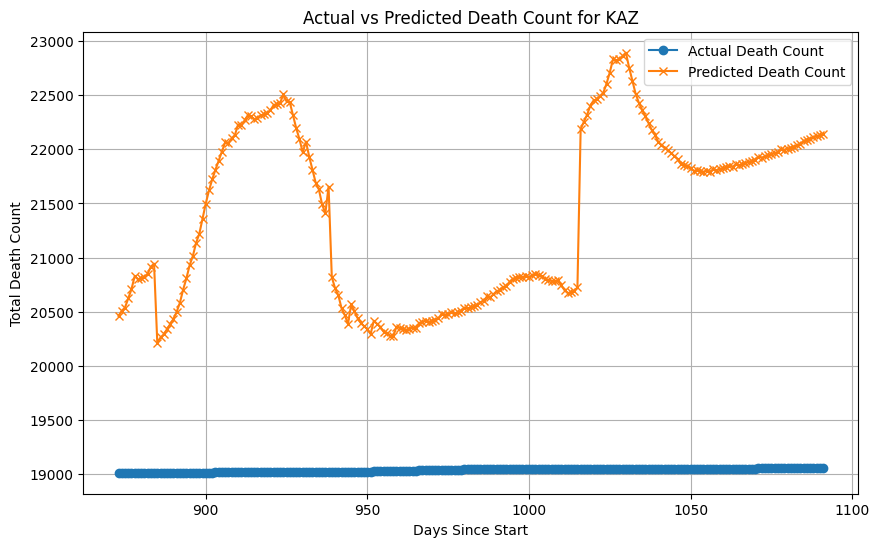

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(country_to_display_filtered['days_since'] , country_to_display_filtered['total_deaths'], label="Actual Death Count", marker='o')
plt.plot(country_to_display_filtered['days_since'], y_pred, label="Predicted Death Count", marker='x')

# Add labels and title
plt.title(f"Actual vs Predicted Death Count for {random_iso_code}")
plt.xlabel("Days Since Start")
plt.ylabel("Total Death Count")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
country_to_display_filtered['total_deaths']

140183    10855.0
140184    10855.0
140185    10866.0
140186    10866.0
140187    10866.0
           ...   
140397    12026.0
140398    12026.0
140399    12026.0
140400    12026.0
140401    12026.0
Name: total_deaths, Length: 219, dtype: float64

In [74]:
y_pred

array([[61869.25741959],
       [61971.83400607],
       [62212.11520424],
       [62296.16168678],
       [62380.20816932],
       [62519.84496368],
       [62548.3011344 ],
       [62576.75730512],
       [62697.86399554],
       [63114.96508485],
       [63161.95135951],
       [63245.99784205],
       [63292.98411672],
       [63321.44028744],
       [63331.36635422],
       [63304.23221312],
       [63706.78499837],
       [63735.24116909],
       [63745.16723588],
       [63718.03309478],
       [63709.42905762],
       [63737.88522834],
       [63710.75108724],
       [64375.85466452],
       [64348.72052342],
       [64321.58638232],
       [64294.45224122],
       [64267.31810013],
       [64221.65385509],
       [64175.98961005],
       [65138.32297649],
       [65111.18883539],
       [65084.05469429],
       [65038.39044926],
       [65011.25630816],
       [64965.59206312],
       [64938.45792202],
       [65994.86372161],
       [65967.72958051],
       [65940.59543942],
